# WGAN-GP Training

## imports

In [5]:
%matplotlib inline

import os
import matplotlib.pyplot as plt

from models.WGANGP import WGANGP
from utils.loaders_a import load_celeb

import pickle


In [62]:
# run params
SECTION = 'gan'
RUN_ID = '0003'
DATA_NAME = 'celeba_200k' #'celeb' ***на 1 уровень выше 
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

    
DS_path = 's:\_ML\Datasets'    

mode =  'build' #'load' #

## data

In [63]:
BATCH_SIZE = 64
IMAGE_SIZE = 64

In [65]:
x_train = load_celeb(DATA_NAME, IMAGE_SIZE, BATCH_SIZE, DS_path)

Found 202560 images belonging to 1 classes.


In [66]:
x_train[0][0][0]

array([[[-0.40392157, -0.827451  , -0.84313726],
        [-0.40392157, -0.827451  , -0.84313726],
        [-0.40392157, -0.827451  , -0.84313726],
        ...,
        [-0.67058825, -0.9137255 , -0.92941177],
        [-0.6784314 , -0.92156863, -0.9372549 ],
        [-0.69411767, -0.92941177, -0.9137255 ]],

       [[-0.40392157, -0.827451  , -0.84313726],
        [-0.40392157, -0.827451  , -0.84313726],
        [-0.40392157, -0.827451  , -0.84313726],
        ...,
        [-0.67058825, -0.9137255 , -0.92941177],
        [-0.6784314 , -0.92156863, -0.9372549 ],
        [-0.69411767, -0.92941177, -0.9137255 ]],

       [[-0.40392157, -0.827451  , -0.84313726],
        [-0.40392157, -0.827451  , -0.84313726],
        [-0.40392157, -0.827451  , -0.84313726],
        ...,
        [-0.67058825, -0.9137255 , -0.92941177],
        [-0.6784314 , -0.92156863, -0.9372549 ],
        [-0.69411767, -0.92941177, -0.9137255 ]],

       ...,

       [[-0.23137255, -0.5529412 , -0.5686275 ],
        [ 0

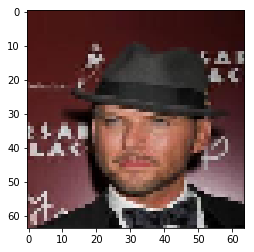

In [67]:
plt.imshow((x_train[0][0][0]+1)/2)

## architecture

In [68]:
gan = WGANGP(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , critic_conv_filters = [64,128,256,512]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,2]
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.0002
        , generator_initial_dense_layer_size = (4, 4, 512)
        , generator_upsample = [1,1,1,1]
        , generator_conv_filters = [256,128,64,3]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [2,2,2,2]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0002
        , optimiser = 'adam'
        , grad_weight = 10
        , z_dim = 100
        , batch_size = BATCH_SIZE
        )

if mode == 'build':
    gan.save(RUN_FOLDER)

else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))


In [69]:
gan.critic.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    [(None, 64, 64, 3)]       0         
_________________________________________________________________
critic_conv_0 (Conv2D)       multiple                  4864      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      multiple                  0         
_________________________________________________________________
critic_conv_1 (Conv2D)       multiple                  204928    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    multiple                  0         
_________________________________________________________________
critic_conv_2 (Conv2D)       multiple                  819456    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    multiple                 

In [70]:
gan.generator.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) [(None, 100)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 8192)              827392    
_________________________________________________________________
batch_normalization (BatchNo (None, 8192)              32768     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 8192)              0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 512)         0         
_________________________________________________________________
generator_conv_0 (Conv2DTran (None, 8, 8, 256)         3277056   
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 256)        

## training

In [71]:
EPOCHS = 100 #6000
PRINT_EVERY_N_BATCHES = 5
N_CRITIC = 5
BATCH_SIZE = 64

In [72]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , n_critic = N_CRITIC
    , using_generator = True
)

W0302 22:57:50.754100 19488 training_v1.py:1982] Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
W0302 22:57:57.482367 19488 training_v1.py:1982] Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
W0302 22:57:58.460899 19488 deprecation.py:323] From c:\toolkits\anaconda3\envs\gen_gpu\lib\site-packages\tensorflow\python\keras\engine\training_v1.py:2070: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


0 (5, 1) [D loss: (-3.8)(R -8.9, F 0.1, G 0.5)] [G loss: -6.3]
1 (5, 1) [D loss: (-100.7)(R -185.9, F 2.7, G 8.3)] [G loss: -63.4]
2 (5, 1) [D loss: (-146.6)(R -243.8, F 3.8, G 9.3)] [G loss: -72.7]
3 (5, 1) [D loss: (-147.8)(R -238.9, F 5.5, G 8.6)] [G loss: -80.3]
4 (5, 1) [D loss: (-151.6)(R -240.6, F 6.6, G 8.2)] [G loss: -83.1]
5 (5, 1) [D loss: (-142.5)(R -242.5, F 9.0, G 9.1)] [G loss: -73.1]
6 (5, 1) [D loss: (-139.9)(R -294.3, F 13.8, G 14.1)] [G loss: -56.8]
7 (5, 1) [D loss: (-132.7)(R -215.7, F 11.7, G 7.1)] [G loss: -72.0]
8 (5, 1) [D loss: (-160.3)(R -282.6, F 15.3, G 10.7)] [G loss: -62.7]
9 (5, 1) [D loss: (-133.7)(R -226.4, F 14.4, G 7.8)] [G loss: -50.7]
10 (5, 1) [D loss: (-140.6)(R -275.3, F 21.0, G 11.4)] [G loss: -34.4]
11 (5, 1) [D loss: (-147.1)(R -232.3, F 15.1, G 7.0)] [G loss: -58.3]
12 (5, 1) [D loss: (-143.7)(R -241.9, F 18.1, G 8.0)] [G loss: -46.3]
13 (5, 1) [D loss: (-129.4)(R -165.6, F 1.6, G 3.5)] [G loss: -40.2]
14 (5, 1) [D loss: (-142.5)(R -243.3, F

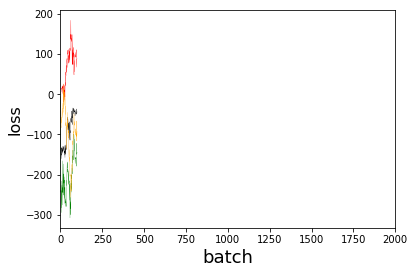

In [73]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 2000)
# plt.ylim(0, 2)

plt.show()
